Lambda School Data Science

*Unit 4, Sprint 2, Module 3*

---

# Neural Network Frameworks (Prepare)

## Learning Objectives
* <a href="#p1">Part 1</a>: Introduce the Keras Sequential Model API
* <a href="#p2">Part 2</a>: Learn How to Select Model Architecture 
* <a href="#p3">Part 3</a>: Discuss the trade-off between various activation functions
* <a href="#p4">Part 4</a>: Regularization Strategies

## Lets Use Libraries!

The objective of the last two days has been to familiarize you with the fundamentals of neural networks: terminology, structure of networks, forward propagation, error/cost functions, backpropagation, epochs, and gradient descent. We have tried to reinforce these topics by requiring to you code some of the simplest neural networks by hand including Perceptrons (single node neural networks) and Multi-Layer Perceptrons also known as Feed-Forward Neural Networks. Continuing to do things by hand would not be the best use of our limited time. You're ready to graduate from doing things by hand and start using some powerful libraries to build cutting-edge predictive models. 

# Keras Sequential API (Learn)

## Overview

> "Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. Use Keras if you need a deep learning library that:

> Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU." 

### Keras Perceptron Sample

In [1]:
import pandas as pd

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
X = df[['x1', 'x2']].values
y = df['y'].values

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This is our perceptron from Monday's by-hand: 
model = Sequential()
model.add(Dense(2,input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(X,y, epochs=5)

Train on 4 samples
Epoch 1/5
4/4 [==============================] - 0s 51ms/sample - loss: 0.3130 - accuracy: 0.2500
Epoch 2/5
4/4 [==============================] - 0s 249us/sample - loss: 0.3126 - accuracy: 0.2500
Epoch 3/5
4/4 [==============================] - 0s 256us/sample - loss: 0.3123 - accuracy: 0.2500
Epoch 4/5
4/4 [==============================] - 0s 256us/sample - loss: 0.3119 - accuracy: 0.2500
Epoch 5/5
4/4 [==============================] - 0s 499us/sample - loss: 0.3115 - accuracy: 0.2500


In [3]:
# evaluate the model
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

4/4 [==============================] - 0s 10ms/sample - loss: 0.3111 - accuracy: 0.2500
accuracy: 25.0


## Follow Along

In the `Sequential` api model, you specify a model architecture by 'sequentially specifying layers. This type of specification works well for feed forward neural networks in which the data flows in one direction (forward propagation) and the error flows in the opposite direction (backwards propagation). The Keras `Sequential` API follows a standardarized worklow to estimate a 'net: 

1. Load Data
2. Define Model
3. Compile Model
4. Fit Model
5. Evaluate Model

You saw these steps in our Keras Perceptron Sample, but let's walk thru each step in detail.

### Load Data

Our life is going to be easier if our data is already cleaned up and numeric, so lets use this dataset from Jason Brownlee that is already numeric and has no column headers so we'll need to slice off the last column of data to act as our y values.

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Stretch - use dropout 
import numpy as np

In [5]:
# Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# X Variable Types
num_classes = 10

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') /255.

# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Define Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

np.random.seed(812)

I'll instantiate my model as a "sequential" model. This just means that I'm going to tell Keras what my model's architecture should be one layer at a time.

In [10]:
# https://keras.io/getting-started/sequential-model-guide/
model = Sequential()

Adding a "Dense" layer to our model is how we add "vanilla" perceptron-based layers to our neural network. These are also called "fully-connected" or "densely-connected" layers. They're used as a layer type in lots of other Neural Net Architectures but they're not referred to as perceptrons or multi-layer perceptrons very often in those situations even though that's what they are.

 > ["Just your regular densely-connected NN layer."](https://keras.io/layers/core/)
 
 The first argument is how many neurons we want to have in that layer. To create a perceptron model we will just set it to 1. We will tell it that there will be 8 inputs coming into this layer from our dataset and set it to use the sigmoid activation function.

In [11]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, input_dim=784, activation="softmax"))

### Compile Model
Using binary_crossentropy as the loss function here is just telling keras that I'm doing binary classification so that it can use the appropriate loss function accordingly. If we were predicting non-binary categories we might assign something like `categorical_crossentropy`. We're also telling keras that we want it to report model accuracy as our main error metric for each epoch. We will also be able to see the overall accuracy once the model has finished training.

#### Adam Optimizer
Check out this links for more background on the Adam optimizer and Stohastic Gradient Descent
* [Adam Optimization Algorithm](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
* [Adam Optimizer - original paper](https://arxiv.org/abs/1412.6980)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit Model

Lets train it up! `model.fit()` has a `batch_size` parameter that we can use if we want to do mini-batch epochs, but since this tabular dataset is pretty small we're just going to delete that parameter. Keras' default `batch_size` is `None` so omiting it will tell Keras to do batch epochs.

In [13]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4672 - accuracy: 0.8773
Epoch 2/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3033 - accuracy: 0.9153
Epoch 3/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2833 - accuracy: 0.9209
Epoch 4/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2731 - accuracy: 0.9239
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2663 - accuracy: 0.9258
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2625 - accuracy: 0.9264
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2580 - accuracy: 0.9285
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2555 - accuracy: 0.9295
Epoch 9/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2525 - accuracy: 0.9304
Epoch 10/10
60

### Evaluate Model

In [14]:
scores = model.evaluate(X_test,y_test)
print("\n")
print("Validation Data Metrics:")
print(f"{model.metrics_names[0]}: {scores[0]}")
print(f"{model.metrics_names[1]}: {scores[1]*100}")

10000/10000 [==============================] - 0s 24us/sample - loss: 0.2620 - accuracy: 0.9269


Validation Data Metrics:
loss: 0.2619707729816437
accuracy: 92.69000291824341


In [15]:
model.predict(X_test[:5])

array([[4.3610544e-07, 2.4068720e-12, 2.2352044e-06, 3.8980227e-03,
        2.5635165e-07, 2.3017968e-05, 3.2244452e-12, 9.9577856e-01,
        1.2023363e-05, 2.8548378e-04],
       [9.8966717e-05, 1.6657408e-06, 9.9223691e-01, 5.1917374e-05,
        5.3899290e-15, 2.5034617e-03, 5.0827819e-03, 3.9199513e-19,
        2.4256562e-05, 1.2600118e-15],
       [6.5193086e-07, 9.8047757e-01, 1.2843520e-02, 2.1916807e-03,
        9.6346565e-05, 6.8216526e-04, 9.0624578e-04, 2.1996291e-04,
        2.3631165e-03, 2.1885475e-04],
       [9.9976510e-01, 8.1988635e-12, 5.9238802e-05, 2.5233014e-06,
        2.4032383e-08, 4.6098328e-05, 1.0286697e-04, 5.6296044e-06,
        6.8641675e-06, 1.1632274e-05],
       [2.8283236e-04, 9.7774397e-08, 1.2932299e-03, 1.6577338e-05,
        9.7259897e-01, 9.4694878e-05, 9.6665986e-04, 2.1291226e-03,
        2.5705425e-03, 2.0047221e-02]], dtype=float32)

In [16]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

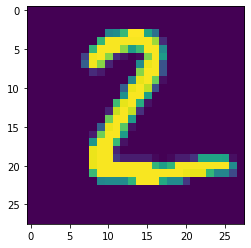

In [17]:
import matplotlib.pyplot as plt

plt.imshow(X_test[1])

### Unstable Results

You'll notice that if we rerun the results might differ from the origin run. This can be explain by a bunch of factors. Check out some of them in this article: 

<https://machinelearningmastery.com/randomness-in-machine-learning/>

## Challenge

You will be expected to leverage the Keras `Sequential` api to estimate a feed forward neural networks on a dataset.

---

# Choosing Architecture (Learn)

## Overview

Choosing an architecture for a neural network is almost more an art than a science. The best way to choose an architecture is through research and experimentation. 

Let's do a few experiments, and track our results using a tool called TensorBoard which is a way to interactively visualize the results of our various experiences. Here is our previous model with TensorBoard incorporated: 

In [18]:
%pwd

'C:\\Users\\ThePi\\Desktop\\Python\\Lambda\\DS-Unit-4-Sprint-2-Neural-Networks\\module3-Intro-to-Keras'

In [19]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [20]:
model = Sequential([
    Flatten(),
    Dense(10, input_dim=784, activation="softmax")
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=5, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4754 - accuracy: 0.8740 - val_loss: 0.3078 - val_accuracy: 0.9162
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3041 - accuracy: 0.9152 - val_loss: 0.2808 - val_accuracy: 0.9225
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2838 - accuracy: 0.9208 - val_loss: 0.2716 - val_accuracy: 0.9248
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2731 - accuracy: 0.9233 - val_loss: 0.2701 - val_accuracy: 0.9255
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2663 - accuracy: 0.9262 - val_loss: 0.2714 - val_accuracy: 0.9240


In [21]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12332), started 0:21:20 ago. (Use '!kill 12332' to kill it.)

## Follow Along

Let's run a couple of experiments in groups based on your birthday: 
1. Jan - March:  Try adding an additional layer to the model
2. April - June: Add 2 hidden layers with identical number of neurons
3. July - Sept: Change the activation functions in the hidden layers (used as many layers as you want)
4. Oct - December: Try changing the optimization function and use any architecture that you want. 

### Additional Hidden Layer

In [22]:
model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2578 - accuracy: 0.9275 - val_loss: 0.1308 - val_accuracy: 0.9614
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1109 - accuracy: 0.9677 - val_loss: 0.1010 - val_accuracy: 0.9692
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0764 - accuracy: 0.9765 - val_loss: 0.0795 - val_accuracy: 0.9752
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0570 - accuracy: 0.9829 - val_loss: 0.0823 - val_accuracy: 0.9751
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0770 - val_accuracy: 0.9783
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0786 - val_accuracy: 0.9774
Epoch 7/10
60000/60000 [==============================] 

In [23]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12332), started 0:21:49 ago. (Use '!kill 12332' to kill it.)

### 2 Additional Hidden Layers

In [24]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model = Sequential([
    Flatten(),
    Dense(1280, input_dim=784, activation='relu'),
    Dense(1280, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 541us/sample - loss: 0.1810 - accuracy: 0.9443 - val_loss: 0.1052 - val_accuracy: 0.9692
Epoch 2/5
60000/60000 [==============================] - 30s 498us/sample - loss: 0.0836 - accuracy: 0.9748 - val_loss: 0.0796 - val_accuracy: 0.9762
Epoch 3/5
60000/60000 [==============================] - 32s 528us/sample - loss: 0.0597 - accuracy: 0.9824 - val_loss: 0.0811 - val_accuracy: 0.9770
Epoch 4/5
60000/60000 [==============================] - 30s 503us/sample - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0760 - val_accuracy: 0.9796
Epoch 5/5
60000/60000 [==============================] - 30s 493us/sample - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0793 - val_accuracy: 0.9784


In [25]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12332), started 0:24:23 ago. (Use '!kill 12332' to kill it.)

### Different Activation Functions

In [26]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12332), started 0:24:24 ago. (Use '!kill 12332' to kill it.)

### Different Optimization Functions

In [27]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2222 - accuracy: 0.9330 - val_loss: 0.1123 - val_accuracy: 0.9668
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0912 - accuracy: 0.9717 - val_loss: 0.0804 - val_accuracy: 0.9726
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0649 - accuracy: 0.9793 - val_loss: 0.0814 - val_accuracy: 0.9753
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0846 - val_accuracy: 0.9741
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0405 - accuracy: 0.9870 - val_loss: 0.0710 - val_accuracy: 0.9785


In [28]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12332), started 0:24:46 ago. (Use '!kill 12332' to kill it.)

## Challenge

You will have to choose your own architectures in today's module project. In the next module, we will discuss hyperparameter optimization which can help you handle these numerous choices. 

---

# Activation Functions (Learn)

## Overview
What is an activation function and how does it work?

- Takes in a weighted sum of inputs + a bias from the previous layer and outputs an "activation" value.
- Based its inputs the neuron decides how 'activated' it should be. This can be thought of as the neuron deciding how strongly to fire. You can also think of it as if the neuron is deciding how much of the signal that it has received to pass onto the next layer. 
- Our choice of activation function does not only affect signal that is passed forward but also affects the backpropagation algorithm. It affects how we update weights in reverse order since activated weight/input sums become the inputs of the next layer. 

## Follow Along

### Step Function

![Heaviside Step Function](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Dirac_distribution_CDF.svg/2560px-Dirac_distribution_CDF.svg.png)

All or nothing, a little extreme, which is fine, but makes updating weights through backpropagation impossible. Why? remember that during backpropagation we use derivatives in order to determine how much to update or not update weights. What is the derivative of the step function?

### Linear Function

![Linear Function](http://www.roconnell.net/Parent%20function/linear.gif)

The linear function takes the opposite tact from the step function and passes the signal onto the next layer by a constant factor. There are problems with this but the biggest problems again lie in backpropagation. The derivative of any linear function is a horizontal line which would indicate that we should update all weights by a constant amount every time -which on balance wouldn't change the behavior of our network. Linear functions are typically only used for very simple tasks where interpretability is important, but if interpretability is your highest priority, you probably shouldn't be using neural networks in the first place.

### Sigmoid Function

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)

The sigmoid function works great as an activation function! it's continuously differentiable, its derivative doesn't have a constant slope, and having the higher slope in the middle pushes y value predictions towards extremes which is particularly useful for binary classification problems. I mean, this is why we use it as the squishifier in logistic regression as well. It constrains output, but over repeated epochs pushes predictions towards a strong binary prediction. 

What's the biggest problem with the sigmoid function? The fact that its slope gets pretty flat so quickly after its departure from zero. This means that updating weights based on its gradient really diminishes the size of our weight updates as our model gets more confident about its classifications. This is why even after so many iterations with our test score example we couldn't reach the levels of fit that our gradient descent based model could reach in just a few epochs.

### Tanh Function

![Tanh Function](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)

What if the sigmoid function didn't get so flat quite as soon when moving away from zero and was a little bit steeper in the middle? That's basically the Tanh function. The Tanh function can actually be created by scaling the sigmoid function by 2 in the y dimension and subtracting 1 from all values. It has basically the same properties as the sigmoid, still struggles from diminishingly flat gradients as we move away from 0, but its derivative is higher around 0 causing weights to move to the extremes a little faster. 

### ReLU Function

![ReLU Function](https://cdn-images-1.medium.com/max/937/1*oePAhrm74RNnNEolprmTaQ.png)

ReLU stands for Rectified Linear Units it is by far the most commonly used activation function in modern neural networks. It doesn't activate neurons that are being passed a negative signal and passes on positive signals. Think about why this might be useful. Remember how a lot of our initial weights got set to negative numbers by chance? This would have dealt with those negative weights a lot faster than the sigmoid function updating. What does the derivative of this function look like? It looks like the step function! This means that not all neurons are activated. With sigmoid basically all of our neurons are passing some amount of signal even if it's small making it hard for the network to differentiate important and less important connections. ReLU turns off a portion of our less important neurons which decreases computational load, but also helps the network learn what the most important connections are faster. 

What's the problem with relu? Well the left half of its derivative function shows that for neurons that are initialized with weights that cause them to have no activation, our gradient will not update those neuron's weights, this can lead to dead neurons that never fire and whose weights never get updated. We would probably want to update the weights of neurons that didn't fire even if it's just by a little bit in case we got unlucky with our initial weights and want to give those neurons a chance of turning back on in the future.

### Leaky ReLU

![Leaky ReLU](https://cdn-images-1.medium.com/max/1600/1*ypsvQH7kvtI2BhzR2eT_Sw.png)

Leaky ReLU accomplishes exactly that! it avoids having a gradient of 0 on the left side of its derivative function. This means that even "dead" neurons have a chance of being revived over enough iterations. In some specifications the slope of the leaky left-hand side can also be experimented with as a hyperparameter of the model!

### Softmax Function

![Softmax Function](https://cdn-images-1.medium.com/max/800/1*670CdxchunD-yAuUWdI7Bw.png)

Like the sigmoid function but more useful for multi-class classification problems. The softmax function can take any set of inputs and translate them into probabilities that sum up to 1. This means that we can throw any list of outputs at it and it will translate them into probabilities, this is extremely useful for multi-class classification problems. Like MNIST for example...

### Major takeaways

- ReLU is generally better at obtaining the optimal model fit.
- Sigmoid and its derivatives are usually better at classification problems.
- Softmax for multi-class classification problems. 

You'll typically see ReLU used for all initial layers and then the final layer being sigmoid or softmax for classification problems. But you can experiment and tune these selections as hyperparameters as well!

## Challenge

You will apply your choice of activation function inside two Keras Seqeuntial models today. 

---

# Regularization Strategies (Learn)

## Overview

Neural Networks are highly parameterized models and can be easily overfit to the training data. The most salient way to combat this problem is with regularization strategies.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/1920px-Regularization.svg.png)

There are four common ways of regularization in neural networks which we cover briefly. Here's a quick summary of how to apply them: 

1. Always use EarlyStopping. This strategy will prevent your weights from being updated well past the point of their peak usefulness.
2. Use EarlyStopping, Weight Decay and Dropout
3. Use EarlyStopping, Weight Constraint and Dropout

Weight Decay and Weigh Constraint accomplish similar purposes - preventing over fitting the parameters by regularizing the values. The mechanics are just slightly different. That's why you would not necessary want to apply them together.

## Follow Along

### Early Stopping

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2191 - accuracy: 0.9346 - val_loss: 0.1105 - val_accuracy: 0.9649
Epoch 2/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0957 - accuracy: 0.9705 - val_loss: 0.0858 - val_accuracy: 0.9736
Epoch 3/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0694 - accuracy: 0.9778 - val_loss: 0.0921 - val_accuracy: 0.9707
Epoch 4/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0548 - accuracy: 0.9829 - val_loss: 0.0820 - val_accuracy: 0.9755
Epoch 5/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0938 - val_accuracy: 0.9759
Epoch 6/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.0799 - val_accuracy: 0.9776
Epoch 7/50
60000/60000 [==============================] 

### Weight Decay

```python
Dense(64, input_dim=64,
            kernel_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l1(0.01))
```

In [30]:
from tensorflow.keras import regularizers



### Weight Constraint

```python
tf.keras.constraints.MaxNorm(
    max_value=2, axis=0
)
```

In [31]:
from tensorflow.keras.constraints import MaxNorm



### Dropout

In [32]:
from tensorflow.keras.layers import Dropout

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='relu'),
    Dropout(.2),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3235 - accuracy: 0.9010 - val_loss: 0.1293 - val_accuracy: 0.9628
Epoch 2/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1551 - accuracy: 0.9536 - val_loss: 0.1059 - val_accuracy: 0.9684
Epoch 3/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1231 - accuracy: 0.9633 - val_loss: 0.0949 - val_accuracy: 0.9724
Epoch 4/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1072 - accuracy: 0.9685 - val_loss: 0.0864 - val_accuracy: 0.9768
Epoch 5/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0956 - accuracy: 0.9720 - val_loss: 0.0734 - val_accuracy: 0.9770
Epoch 6/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0851 - accuracy: 0.9742 - val_loss: 0.0739 - val_accuracy: 0.9790
Epoch 7/50
60000/60000 [==============================] 

In [33]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12332), started 0:25:50 ago. (Use '!kill 12332' to kill it.)

## Challenge

You will apply regularization strategies inside your neural network today, as you try to avoid overfitting it. 

---

In [34]:
print('h')

h
